In [2]:
import pandas as pd
from sklearn.datasets import load_digits
d=load_digits()

In [3]:
dir(d)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
df=pd.DataFrame(d.data,columns=d.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [5]:
d.target

array([0, 1, 2, ..., 8, 9, 8])

In [7]:
df.shape

(1797, 64)

In [8]:
df['target']=d.target

In [13]:
from sklearn.decomposition import PCA
p=PCA()
x=df.drop('target',axis='columns')
xd=p.fit_transform(x)

In [15]:
xd[:5]

array([[-1.25946645e+00,  2.12748835e+01, -9.46305462e+00,
         1.30141887e+01, -7.12882278e+00, -7.44065876e+00,
         3.25283716e+00,  2.55347036e+00, -5.81842142e-01,
         3.62569695e+00,  2.58595688e+00,  1.55160708e+00,
         8.54496709e-01, -3.33874935e+00,  5.90658968e+00,
         2.74359339e+00,  4.19836907e-01, -8.98149693e-01,
         7.02610866e-01, -3.46211868e+00,  2.68084958e+00,
         1.00944951e+00,  2.00970276e+00,  1.29531479e+00,
         1.17887873e+00,  2.30058185e+00,  3.67072108e+00,
        -9.43668900e-01, -1.13250195e+00,  2.35979550e+00,
        -1.81738593e+00, -7.55016284e-01,  1.62841809e-01,
        -2.11297739e+00,  1.09482318e+00,  1.95685532e-01,
        -8.99936129e-02, -2.76374068e+00,  1.08888322e+00,
         2.06004009e-01,  1.70451133e+00,  5.81318379e-01,
         7.12698392e-01, -1.88038868e-01,  6.28313404e-01,
        -5.94986903e-01,  4.76923307e-02, -7.13294070e-01,
        -3.39315207e-01,  4.30994090e-02, -4.21401144e-0

In [16]:
y=df.target

In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(xd,y,test_size=0.2,random_state=10)
len(xtest)

360

In [23]:
from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier(n_neighbors=12)
k.fit(xtrain,ytrain)
ypre=k.predict(xtest)
k.score(xtest,ytest)

0.9805555555555555

In [26]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ypre,ytest)

In [25]:
cm

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 33,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 31,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  0],
       [ 0,  2,  0,  1,  0,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  0, 37]], dtype=int64)

Text(33.0, 0.5, 'ypre')

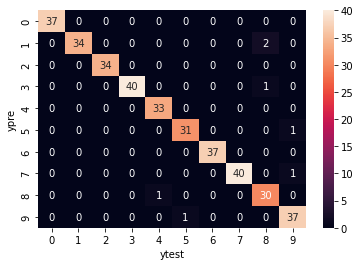

In [27]:
import matplotlib.pyplot as pp
import seaborn as ss
ss.heatmap(cm,annot=True)
pp.xlabel('ytest')
pp.ylabel('ypre')

In [28]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.94      1.00      0.97        34
           2       1.00      1.00      1.00        34
           3       0.98      1.00      0.99        40
           4       1.00      0.97      0.99        34
           5       0.97      0.97      0.97        32
           6       1.00      1.00      1.00        37
           7       0.98      1.00      0.99        40
           8       0.97      0.91      0.94        33
           9       0.97      0.95      0.96        39

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

